### Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00025: Introduction to Vibration Theory


## Test P1 (2024/1): time and frequency domain analysis of sdof systems

---


In [2]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import matplotlib.pyplot as plt

from MRPy import *


## Questão 1

Uma torre esbelta tem massa equivalente $m = 1.0$ton, rigidez $k = 3EI/L^3$, e amortecimento $\zeta = 1$% (razão do crítico). A altura da massa (e do topo) é $L = 10$m, enquanto a  rigidez à flexão, $EI$, é tal que a frequência natural de vibração livre resulta ser $f_{\rm n} = 0.5$Hz. Sobre a massa atua uma força impulsiva devida ao impacto (perfeitamente elástico) de um projétil de massa $m_{\rm p} = 50$kg que se desloca a uma velocidade $v_{\rm p} = 100$km/h. Pergunta-se:

1. Qual o máximo deslocamento do topo da torre após o impacto?
2. Qual a máxima aceleração do topo da torre após o impacto?
3. Qual a amplitude do deslocamento após transcorrerem 5 segundos?
4. Quais as máximas reações de apoio $M_{\rm A}$ (momento) e $H_{\rm A}$ (força horizontal)? 

<img src="resources/tests/PEC00025A_241_P1_Q1.JPG" alt="Question 1" width="320px"/>


### Cálculo das propriedades do sistema

Nos cálculos abaixo se considera que o projétil rebota após o impacto, sem perdas e,
portanto, terá velocidade $v_{\rm p}$ com o sentido contrário. Isso faz com que a 
quantidade de movimento antes do impacto seja:

$$ Q_0 = m_{\rm p} v_{\rm p} $$

e após o impacto seja:

$$ Q = M V_0 - m_{\rm p} v_{\rm p} $$

Considerando a conservação da quantidade de movimento $Q = Q_0$ têm-se:

$$ V_0 = 2 m_{\rm p} v_{\rm p} / M $$

onde $V_0$ é a velocidade inicial (pós impacto) da massa no topo da torre.


In [17]:
L  =  10.               # altura da torre (m)
M  =  1000.             # massa no topo da torre (kg)
zt =  0.01              # amortecimento razão do crítico
fn =  0.5               # frequência fundamental da torre (Hz)
wn =  2*fn*np.pi        # frequência fundamental em rad/s

mp =  50.               # massa do projétil
vp =  100/3.6           # velocidade do projétil (m/s)
Qp =  mp*vp             # quantidade de movimento inicial

g  =  9.81              # gravidade (m/s2)

k  =  M*wn*wn           # coeficiente de rigidez
EI =  k*(L**3)/3        # rigidez à flexão da torre

V0 =  2*Qp/M            # o projétil REBOTA com velocidade vp!!!
Td =  1/fn/4.           # máxima duração do contato para ser Dirac
Lp =  vp*Td/2           # mínimo comprimento do projétil (onda vai e volta)

print('Rigidez da torre ...................  k = {0:7.0f} N/m'.format(k))
print('Rigidez à flexão da torre .......... EI = {0:7.0f} Nm2'.format(EI))
print('Velocidade inicial do projétil ..... vp = {0:7.1f} m/s\n'.format(vp))
print('Máxima duração para ser Dirac ...... Td = {0:7.1f} s'.format(Td))
print('Máximo comprimento do projétil ..... Lp = {0:7.1f} m\n'.format(Lp))

print('Velocidade da torre após impacto ... V0 = {0:7.2f} m/s'.format(v0))


Rigidez da torre ...................  k =    9870 N/m
Rigidez à flexão da torre .......... EI = 3289868 Nm2
Velocidade inicial do projétil ..... vp =    27.8 m/s

Máxima duração para ser Dirac ...... Td =     0.5 s
Máximo comprimento do projétil ..... Lp =     6.9 m

Velocidade da torre após impacto ... V0 =    2.78 m/s


### 1) Deslocamento máximo

Considerando portanto que o projétil tenha comprimento menor que 6.9m, o que garante
um tempo de contato inferior a 0.5s (1/4 do período de vibração da torre), podemos
considerar que o impulso é de curtíssima duração. Consequentemente, a resposta
dinâmica será a resposta à velocidade inicial $V_0 = 2.78$m/s calculada.


In [29]:
wD   = np.sqrt(1 - zt*zt)*wn
umax = V0/wD

print('Deslocamento devido à velocidade inicial... u_max = {0:5.3f} m'.format(umax))


Deslocamento devido à velocidade inicial... u_max = 0.884 m


O cálculo abaixo, obviamente não exigido na prova, apresenta o resultado correto para essa questão utilizado
uma integração por Duhamel.


Deslocamento máximo por simulação ......... u_pk  = 0.870 m


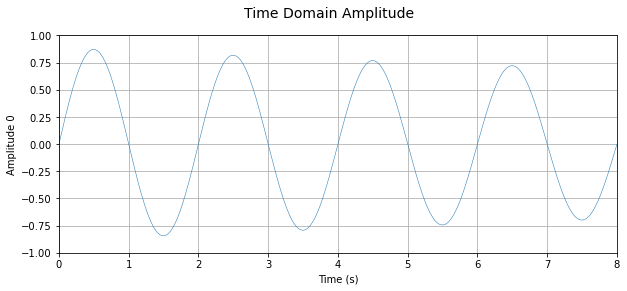

In [32]:
F   = MRPy.zeros(NX=1, N=1024, fs=128.)
u   = F.sdof_Duhamel(fn, zt, V0=V0)
upk = np.max(np.abs(u[0]))

print('Deslocamento máximo por simulação ......... u_pk  = {0:5.3f} m'.format(upk))

u.plot_time(fig=1, figsize=[10,4], axis_t=[0, u.Td, -1, 1]);


### 2) Máxima aceleração da torre após impacto

A resposta devida à velocidade inicial reverte o sinal e é maior que a resposta devida à força impulsiva,
que não reverte o sinal. Portanto a resposta total terá reversão de sinal, como de fato pode ser observado
no gráfico da solução por Duhamel.

Pode-se então supor que o contato só será desfeito no momento em que o deslocamento atinge o pico com o
sinal revertido, o que ocorre mais ou menos aos 3/4 do período natural de vibração livre do sistema
pessoa+trampolim.


In [5]:
Tn  = 1/fn               # período de vibração (pessoa + trampolim)
tk1 = 3*Tn/4             # perda de contato estimada

t   = u.t_axis()         # perda de contato pela solução por Duhamel
kt  = np.argmax(u[0])
tk2 = t[kt]

print('A perda de contato ocorrerá aos {0:5.3f} s'.format(tk1))
print('Pela solução por Duhamel seria aos {0:5.3f} s'.format(tk2))


A perda de contato ocorrerá aos 0.532 s
Pela solução por Duhamel seria aos 0.571 s


Portanto o critério usado para a estimativa é razoável.


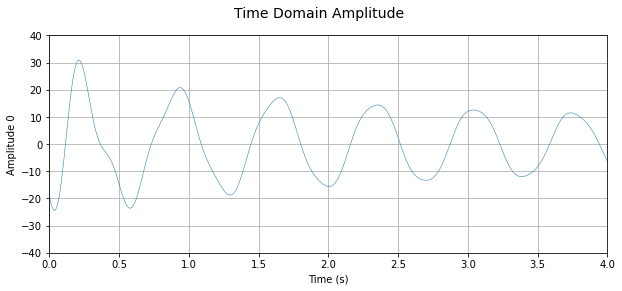

In [6]:
band = [2/u.Td, u.fs/32]
a    =  u.differentiate(band=band).differentiate(band=band)

a.plot_time(fig=2, figsize=[10,4], axis_t=[0, a.Td/2, -40, 40]);


### 3) Trampolim sem a pessoa

A partir do momento em que o trampolim está oscilando sem a pessoa sua frequência natural aumenta, 
porque embora a rigidez permaneça a mesma a massa aderida diminui.


In [7]:
wnt = np.sqrt(k/mt)
fnt = wnt/2/np.pi
Tnt = 1/fnt

print('Período de vibração pessoa+trampolin:     {0:5.2f} s'.format(Tn))
print('Período de vibração só trampolim:         {0:5.2f} s'.format(Tnt))


Período de vibração pessoa+trampolin:      0.71 s
Período de vibração só trampolim:          0.32 s


Portanto o período reduz-se para aproximadamente a metade. 

Considerando que houve uma restituição total da energia cinética, a velocidade da pessoa ao se soltar do trampolim é a mesma do instante de contato inicial. 

O tempo para retornar ao contato é dado pela equação da posição de um corpo acelerado:

$$ u = u_0 + v_0 t + \frac{a t^2}{2} $$

com $u = u_0$ (retorno à mesma posição inicial) e $a = g$. Isolando-se $t$ tem-se:

$$ t = \frac{2v_0}{g}$$

onde $v_0$ é a velocidade da pessoa no momento do contato inicial (3m/s).
Dividindo-se o tempo transcorrido pelo período do trampolim vazio tem-se então:


In [8]:
T1 = 2*vp/g
N  = T1/Tnt

print('Tempo até novo contato:                   {0:5.2f} s'.format(T1))
print('Número aprox. de oscilações do trampolim: {0:7.0f}'.format(np.round(N)))


Tempo até novo contato:                    0.61 s
Número aprox. de oscilações do trampolim:       2


### 4) Máximas reações de apoio

As máximas reações podem ser estimadas a partir da força estática equivalente. 
Para isso, vamos usar o deslocamento máximo (superestimado) do item (1).


In [9]:
Feq = umax*k           # força estática equivalente

MA  = L*Feq            # momento reativo
VA  = Feq              # reação vertical

print('Momento reativo no engaste: {0:5.0f} Nm'.format(MA))
print('Reação vertical no engaste: {0:5.0f} N'.format(VA))


Momento reativo no engaste:  7391 Nm
Reação vertical no engaste:  3696 N


Contudo, o valor correto calculado a partir da solução por Duhamel (não exigida na prova) seria:

In [10]:
Feq = u_pk*k           # força estática equivalente

MA  = L*Feq            # momento reativo
VA  = Feq              # reação vertical

print('Momento reativo no engaste: {0:5.0f} Nm'.format(MA))
print('Reação vertical no engaste: {0:5.0f} N'.format(VA))


Momento reativo no engaste:  5949 Nm
Reação vertical no engaste:  2974 N


## Questão 2

A mesma torre da questão anterior é submetida à força do vento atuando sobre a massa, descrita na forma de uma densidade espectral dada abaixo. 

5. Qual o valor r.m.s. do deslocamento do topo da torre? 
6. Qual o valor de pico da aceleração no topo da torre?
7. Quais as máximas reações de apoio MA (momento) e HA (força horizontal)?
8. Após 64 segundos, por quanto tempo o momento MA superou metade do valor máximo?

<img src="resources/tests/PEC00025A_241_P1_Q2.jpg" alt="Question 2" width="640px"/>  


### Cálculo das propriedades do sistema


In [11]:
h  =  0.1            # amplitude do deslocamento na base
l0 =  2.             # distância entre rodas (m)
m  =  200.           # massa oscilante total (kg)
zt =  0.01           # amortecimento razão do crítico
g  =  9.81           # gravidade (m/s2)


### 2.1 Velocidade máxima

Com a mola considerada rígida, a massa acompanha o relevo do terreno. Isso implica em um deslocamento da base
igual ao deslocamento da massa com uma frequência igual a $f_0 = v_{\rm max}/\lambda_0$.
O deslocamento vertical é uma função harmônica:

$$ u(t) = h \sin (2\pi f_0 t) = h \sin \left( \frac{2\pi v_{\rm max} t}{\lambda_0} \right) $$


O critério para que o carrinho não descole do terreno é a aceleração vertical não superar a gravidade.
A aceleração é a segunda derivada do deslocamento.

$$ a = \frac{d^2 u}{dt^2}  = 
- h \left(\frac{2\pi v_{\rm max}}{\lambda_0} \right)^2 \sin \left( \frac{2\pi v_{\rm max} t}{\lambda_0} \right)  > -g $$

Portanto o limite de velocidade é dado por:

$$ h \left(\frac{2\pi v_{\rm max}}{\lambda_0} \right)^2 = g $$

Que resulta em:

$$ v_{\rm max} = \frac{\lambda_0}{2\pi} \sqrt{\frac{g}{h}}$$


In [12]:
vmax = (l0/2/np.pi)*np.sqrt(g/h)

print('Máxima velocidade para manter contato:    {0:5.2f} m/s'.format(vmax))


Máxima velocidade para manter contato:     3.15 m/s


### 2.2 Amplitude de vibração para velocidade $v_{\rm max}/2$

A aceleração na base é dada pela mesma expressão anterior, mas 
com a velocidade agora reduzida à metade:

$$ a = - h \left(\frac{\pi v_{\rm max}}{\lambda_0} \right)^2 \sin \left( \frac{\pi v_{\rm max} t}{\lambda_0} \right)$$

onde a frequência de excitação é dada por:

$$ f_0 = \frac{\pi v_{\rm max}}{2\pi \cdot \lambda_0} = \frac{v_{\rm max}}{2\lambda_0} $$

Calculando amplitude e frequência da excitação:


In [13]:
aG = h*((np.pi*vmax/l0)**2)
f0 = vmax/(2*l0)

print('Amplitude da aceleração:                  {0:5.2f} m/s2'.format(aG))
print('Frequência da excitação harmônica:        {0:5.2f} Hz'.format(f0))


Amplitude da aceleração:                   2.45 m/s2
Frequência da excitação harmônica:         0.79 Hz


Para que a amplitude total seja no máximo $2h$, a amplitude do sistema deve ser
no máximo $h$, visto que já ocorre uma amplitude $h$ inerente ao próprio relevo.

No cálculo a seguir, vamos variando a frequência $f_{\rm n}$ até ter a amplitude 
de deslocamento desejada:


In [19]:
fn =   1.414*f0              # valor obtido por tentativa e erro
k  = ((2*np.pi*fn)**2)*m
ue =   aG*m/k

bt =   f0/fn
A  =   np.sqrt(1/((1 - bt**2)**2 + (2*zt*bt)**2))
ud =   A*ue

print('Frequência natural de vibração livre:     {0:5.3f} Hz'.format(fn))
print('Resposta em deslocamento estático:        {0:5.3f} m'.format(ue))
print('AMPLITUDE DA RESPOSTA EM DESLOCAMENTO:    {0:5.3f} m'.format(ud))
print('Fator de amplificação dinâmica:           {0:5.3f}'.format(A))
print('Rigidez calibrada:                        {0:5.3f} kN/m'.format(k/1000))


Frequência natural de vibração livre:     1.114 Hz
Resposta em deslocamento estático:        0.050 m
AMPLITUDE DA RESPOSTA EM DESLOCAMENTO:    0.100 m
Fator de amplificação dinâmica:           2.000
Rigidez calibrada:                        9.807 kN/m


### 2.3 Máxima reação vertical

A máxima amplitude de deslocamento é portanto $h$, que multiplicada pela rigidez
dá a força da mola sobre a massa. Essa força deve ser ainda ser acrescida do peso
da massa (quando a roda passa pelo ponto mais baixo) e dividida entre os
dois eixos. Portanto:


In [20]:
R = (h*k + m*g)/2/g

print('Máxima reação em cada eixo:               {0:5.2f} kgf'.format(R))


Máxima reação em cada eixo:               149.98 kgf
